<a href="https://colab.research.google.com/github/Soumya169/25-days-Of-Coding-Challenge-Scaler-/blob/main/Boston_Data_Prediction_of_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'boston-housing-dataset' dataset.
Path to dataset files: /kaggle/input/boston-housing-dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
boston = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [45]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [5]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [10]:
boston.fillna(boston.mean(), inplace=True)


In [11]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


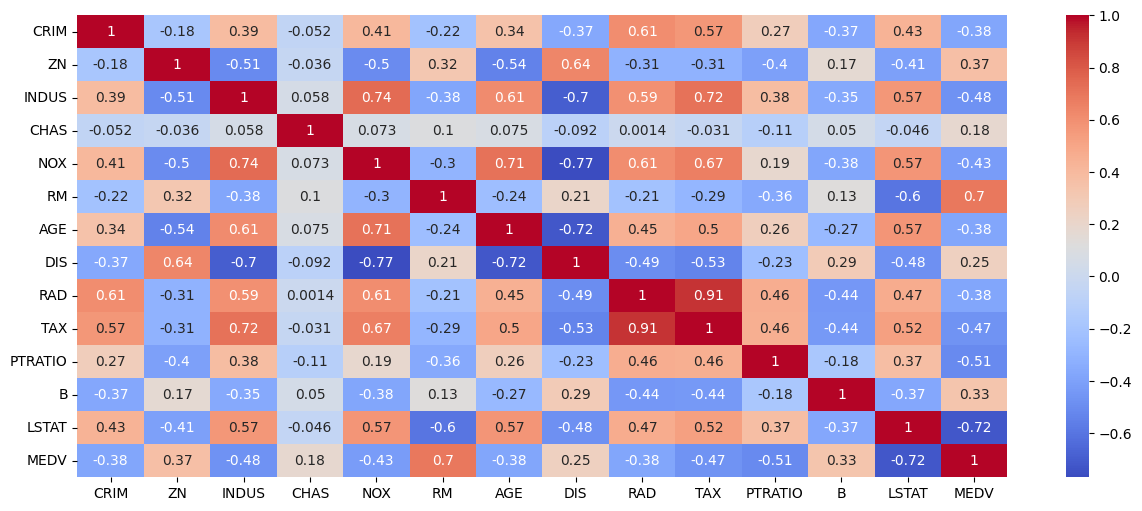

In [12]:
boston.corr()
corr=boston.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data=corr , annot=True , cmap='coolwarm')
plt.show()

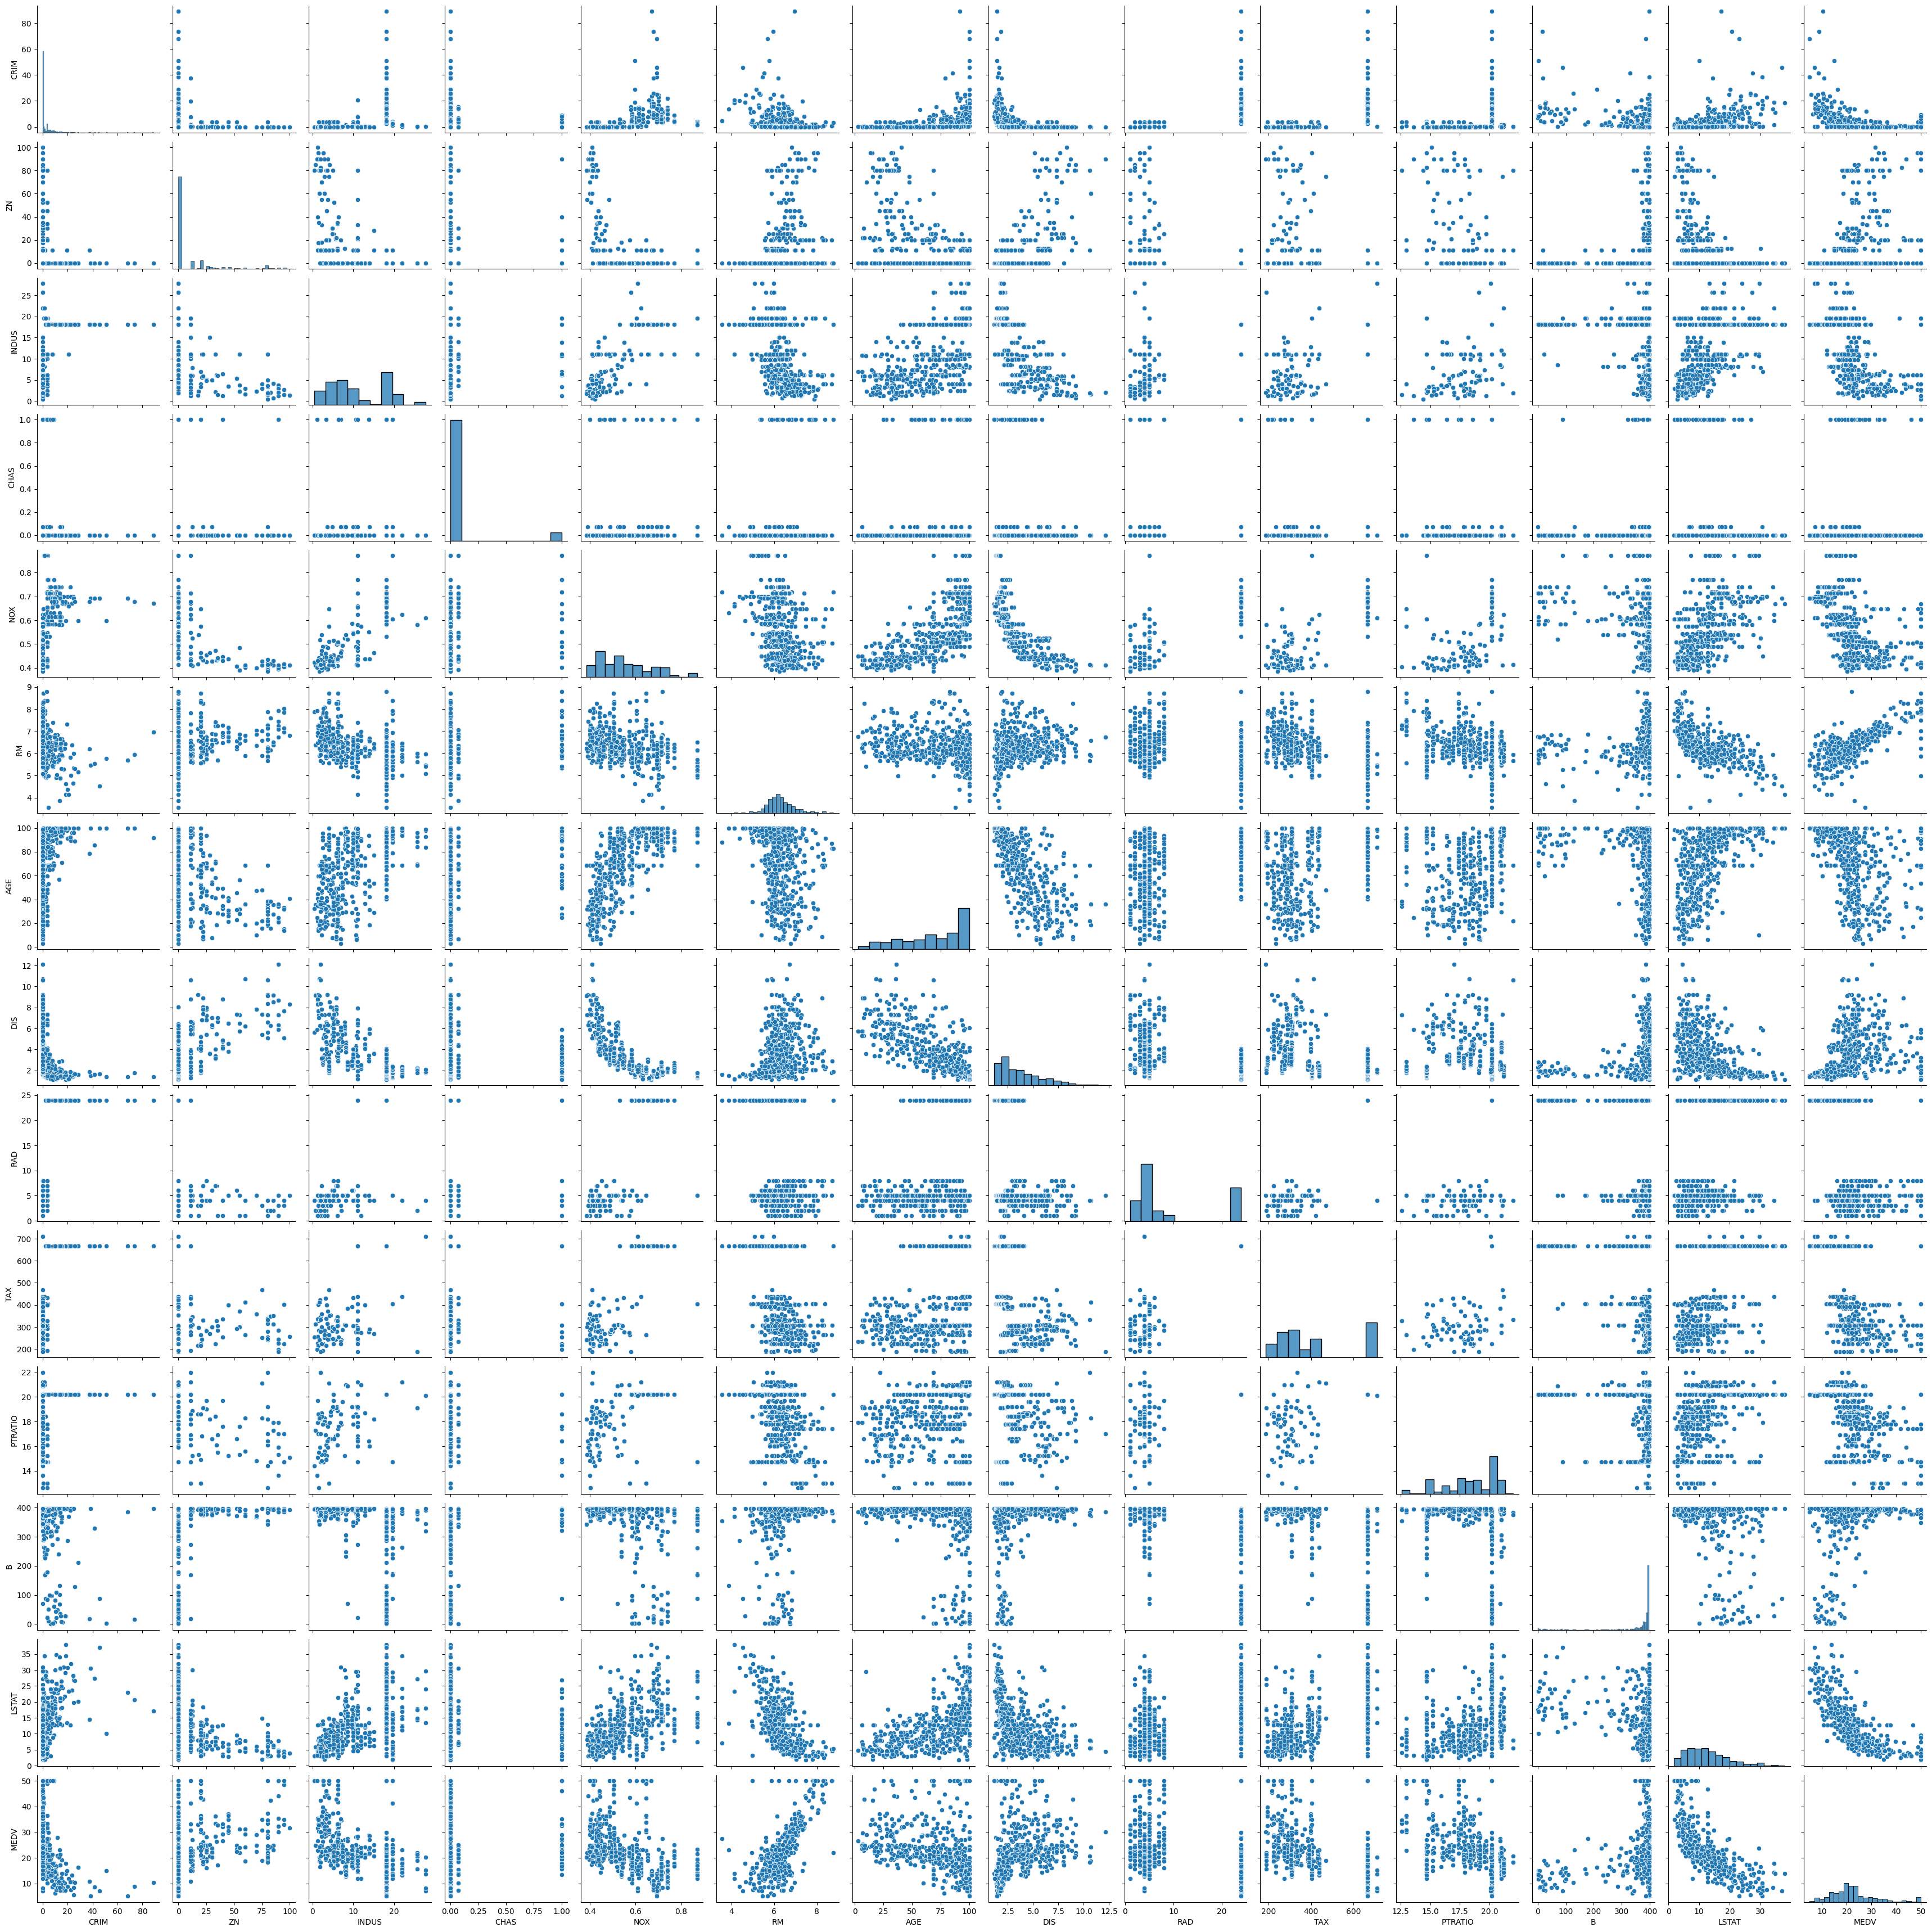

In [13]:
sns.pairplot(boston)

Text(0, 0.5, 'Price')

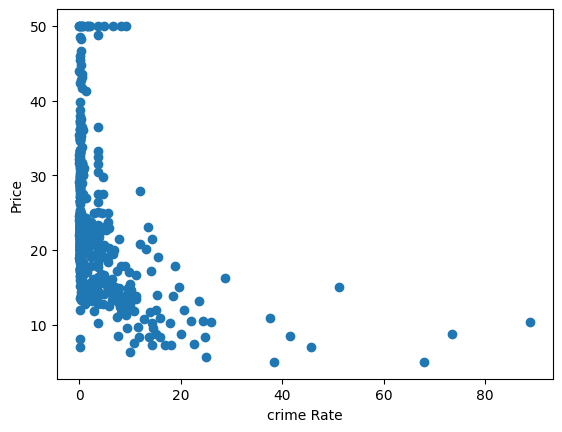

In [14]:
plt.scatter(boston['CRIM'] , boston['MEDV'])
plt.xlabel('crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

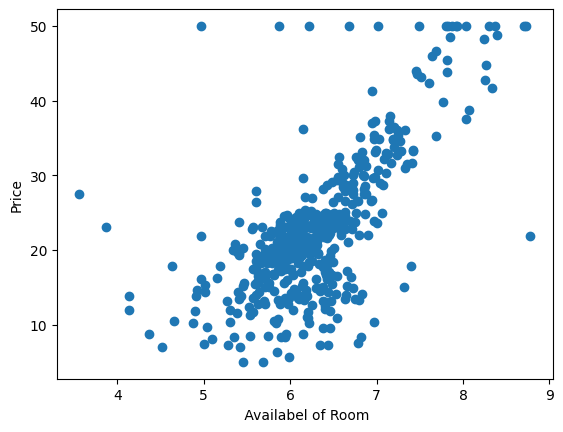

In [15]:
plt.scatter(boston['RM'] , boston['MEDV'])
plt.xlabel(' Availabel of Room')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='MEDV'>

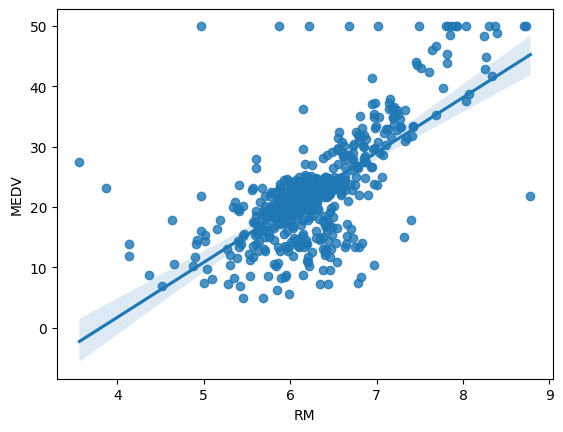

In [16]:
import seaborn as sns
sns.regplot(x="RM" , y="MEDV" , data = boston)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

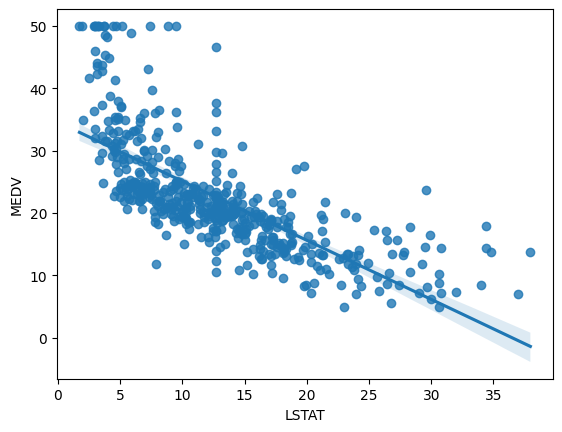

In [17]:
sns.regplot(x="LSTAT" , y="MEDV" , data = boston)

<Axes: xlabel='CHAS', ylabel='MEDV'>

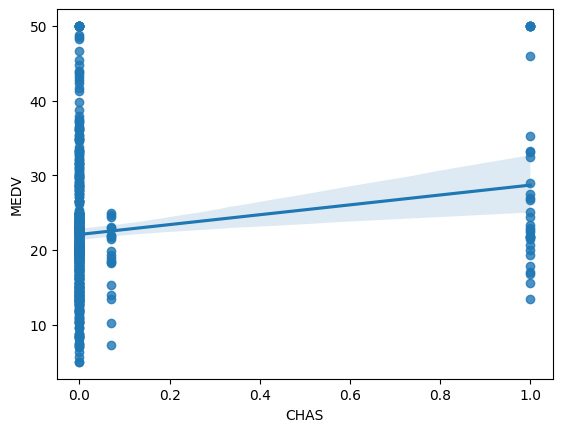

In [18]:
sns.regplot(x="CHAS" , y="MEDV" , data = boston)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

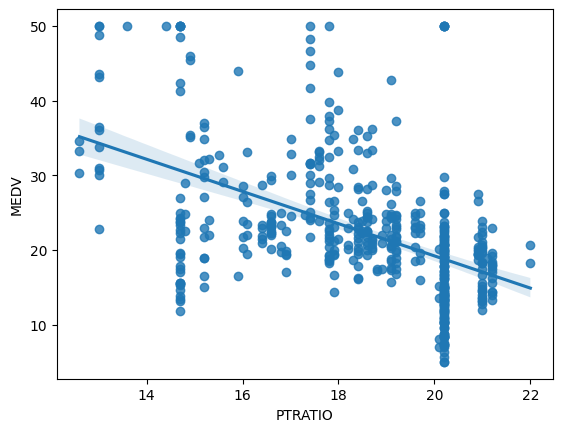

In [19]:
sns.regplot(x="PTRATIO" , y="MEDV" , data = boston)

In [20]:
X=boston.iloc[:,:-1]
X
y=boston.iloc[:,-1]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size =0.3 , random_state = 42 )

In [22]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [23]:
y_train

,MEDV
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [24]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.040000
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.530000
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.070000
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.520000
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.100000,0.0,0.740,6.406,97.200000,2.0651,24,666,20.2,385.96,12.715432
23,0.98843,0.0,8.140000,0.0,0.538,5.813,100.000000,4.0952,4,307,21.0,394.54,19.880000
225,0.52693,0.0,6.200000,0.0,0.504,8.725,83.000000,2.8944,8,307,17.4,382.00,4.630000
433,5.58107,0.0,18.100000,0.0,0.713,6.436,87.900000,2.3158,24,666,20.2,100.19,16.220000


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)

X_test =  scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()

In [28]:
Regression.fit(X_train , y_train)

LinearRegression()

In [29]:
Regression.coef_

array([-1.06184703,  0.71347682, -0.07272768,  0.94344207, -1.62856223,
        3.17333232, -0.70109167, -3.04177516,  1.69879013, -1.20047368,
       -1.99733627,  1.02127847, -3.28653232])

In [30]:
Regression.intercept_

np.float64(23.01581920903955)

In [31]:
Regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
reg_pred=Regression.predict(X_test)
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

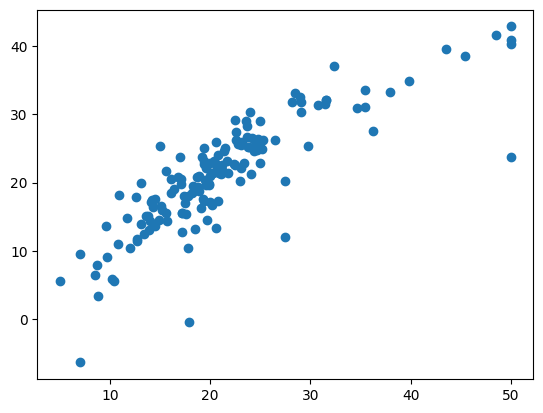

In [33]:
plt.scatter(y_test , reg_pred)

In [34]:
residuals = y_test -reg_pred
residuals

,MEDV
173,-5.346842
274,-4.680947
491,-1.563343
72,-2.799770
452,-2.420504
...,...
441,-3.386594
23,0.905782
225,9.774023
433,-2.093079


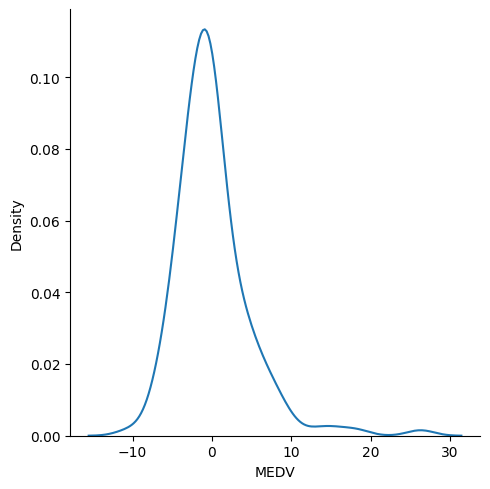

In [35]:
sns.displot(residuals , kind = 'kde')

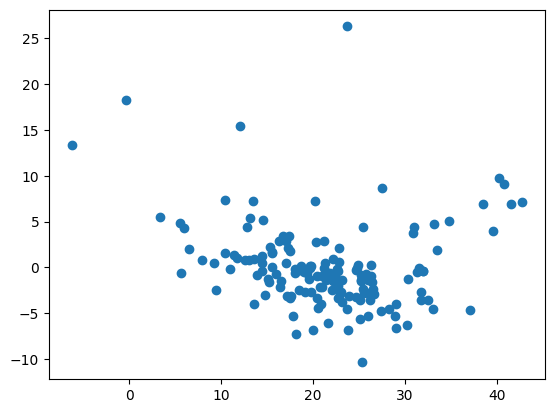

In [36]:
plt.scatter(reg_pred , residuals)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test , reg_pred))
print(mean_squared_error(y_test , reg_pred))
print(np.sqrt(mean_squared_error(y_test , reg_pred)))


3.1410525671084684
21.818457953526053
4.671023223398279


**R SQUARE AND ADUSTED R SQUARE **

In [38]:
#R Square
from sklearn.metrics import r2_score
score = r2_score(y_test , reg_pred)
score

0.7071862632031753

In [39]:
#Adjusted R Square

adj = 1-(1-score)*(len(y_test)-1) /(len(y_test)-X_test.shape[1]-1)
adj


0.6796023604614455

In [40]:
single_house = X.iloc[0].values.reshape(1, -1)
single_house = scaler.transform(single_house)

prediction = Regression.predict(single_house)
print("Predicted MEDV:", prediction)

Predicted MEDV: [30.2586963]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
import pickle
pickle.dump(Regression , open('regmodel.pkl' , 'wb'))
pickled_model=pickle.load(open('regmodel.pkl' , 'rb'))
pickled_model.predict(single_house)

array([30.2586963])

In [42]:
import pickle
import numpy as np

pickle.dump(Regression, open('regmodel.pkl', 'wb'))

pickle.dump(scaler, open('scaler.pkl', 'wb'))

pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

single_house = X.iloc[0].values.reshape(1, -1)

single_house = loaded_scaler.transform(single_house)

prediction = pickled_model.predict(single_house)

print("Predicted MEDV:", prediction)
print("Actual MEDV:", y.iloc[0])


Predicted MEDV: [30.2586963]
Actual MEDV: 24.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
from google.colab import files

files.download('regmodel.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
sample_house = [[
    15,   # CRIM
    0,      # ZN
    18,      # INDUS
    1,         # CHAS
    0.74,     # NOX
    4.51,     # RM
    95,      # AGE
    1.11,    # DIS
    24,         # RAD
    680,       # TAX
    20,      # PTRATIO
    50.48 ,    # B
    35.05       # LSTAT
]]

sample_house_scaled = scaler.transform(sample_house)

print("Predicted MEDV:", Regression.predict(sample_house_scaled))


Predicted MEDV: [2.10793327]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
